<a href="https://colab.research.google.com/github/rithik849/crop-classification/blob/main/Crop_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import keras.utils
import sys
import matplotlib.pyplot as plt
import sklearn

from sklearn.model_selection import train_test_split

from sklearn import utils

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
print(sys.version)
print(np.__version__)
print(tf.__version__)

print(sklearn.__version__)


3.8.10 (default, Nov 14 2022, 12:59:47) 
[GCC 9.4.0]
1.22.4
2.11.0
1.2.1


In [3]:
from google.colab import drive
PATH = '/content/gdrive'
drive.mount(PATH)

Mounted at /content/gdrive


# Get data
## Using kaggle dataset
https://www.kaggle.com/datasets/mdwaquarazam/agricultural-crops-image-classification

In [4]:
DIR_NAME = "Agricultural-crops"

In [5]:
current_path = os.getcwd()
IN_COLAB = 'google.colab' in sys.modules
data_path = os.path.join(PATH,"MyDrive",DIR_NAME) if IN_COLAB else os.path.join(current_path,DIR_NAME)

In [6]:
data_path

'/content/gdrive/MyDrive/Agricultural-crops'

# Format as a list of input-sample pairs

In [7]:
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.image import resize, ResizeMethod
import requests

In [8]:
# Convert an image to an array of a set size
def jpg2arr(img_path,size):
    load = load_img(img_path)
    array = img_to_array( load )
    resized = resize( array ,size = size, method = ResizeMethod.BILINEAR )
    return resized.numpy()

In [9]:
IMG_WIDTH = 224
IMG_HEIGHT = 224

In [10]:
directories = [i for i in os.listdir(data_path) if str(i)[0]!="."]
print(directories)
samples = []
labels = []
classes = set()
for d in directories:
    class_path = os.path.join(data_path,d)
    classes.add(d.lower())
    for img in os.listdir(class_path):
        image_path = os.path.join(class_path,img)
        samples.append(jpg2arr(image_path , (IMG_HEIGHT, IMG_WIDTH) ))
        labels.append(str(d))

print(classes)

['Tobacco-plant', 'cotton', 'Lemon', 'Cherry', 'chilli', 'gram', 'Cucumber', 'sugarcane', 'Pearl_millet(bajra)', 'rice', 'vigna-radiati(Mung)', 'tea', 'Olive-tree', 'jowar', 'cardamom', 'clove', 'Fox_nut(Makhana)', 'coconut', 'almond', 'wheat', 'maize', 'jute', 'sunflower', 'banana', 'tomato', 'pineapple', 'soyabean', 'mustard-oil', 'papaya', 'Coffee-plant']
{'clove', 'pineapple', 'sugarcane', 'tobacco-plant', 'chilli', 'lemon', 'cucumber', 'olive-tree', 'maize', 'tea', 'almond', 'soyabean', 'jowar', 'rice', 'papaya', 'cardamom', 'fox_nut(makhana)', 'pearl_millet(bajra)', 'vigna-radiati(mung)', 'jute', 'cherry', 'tomato', 'mustard-oil', 'gram', 'cotton', 'sunflower', 'wheat', 'coconut', 'coffee-plant', 'banana'}


In [11]:
NUM_SAMPLES = len(samples)
NUM_CLASSES = len(labels)
NUM_SAMPLES, NUM_CLASSES, NUM_SAMPLES//len(set(labels))

(829, 829, 27)

# Models

In [12]:
# Normalize the images
X = np.stack(samples,axis=0)*(1/255)

In [13]:
y = np.stack(labels,axis=0)

In [14]:
X.shape , y.shape

((829, 224, 224, 3), (829,))

Text(0.5, 1.0, 'Tobacco-plant')

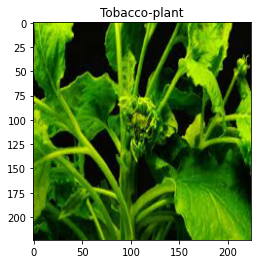

In [15]:
plt.imshow(X[3])
plt.title(y[3])

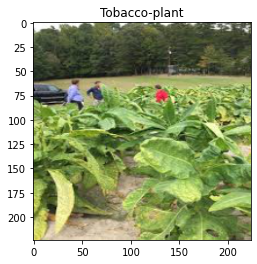

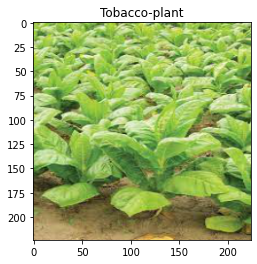

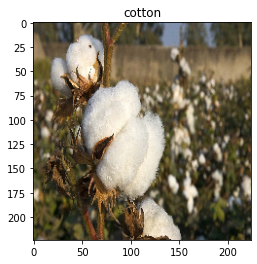

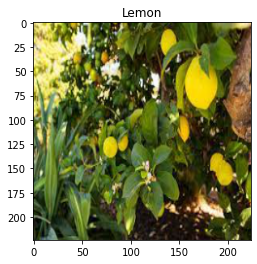

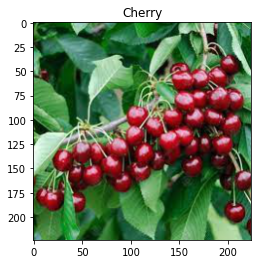

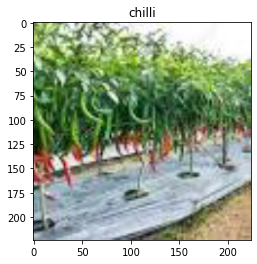

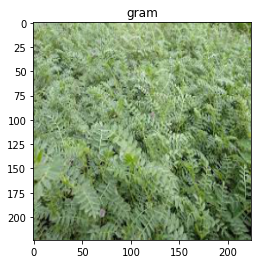

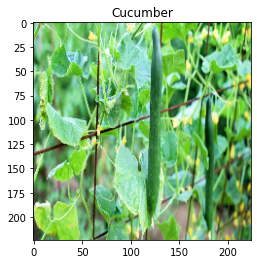

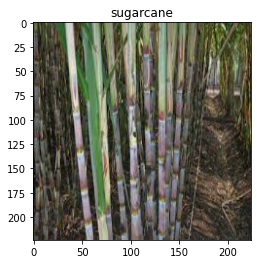

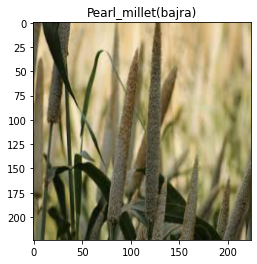

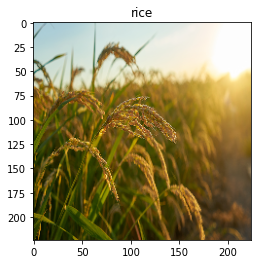

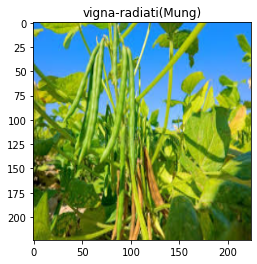

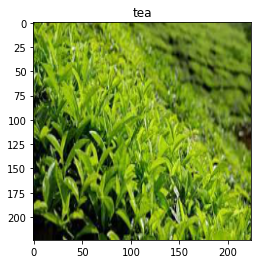

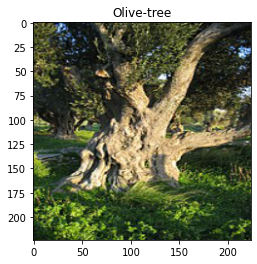

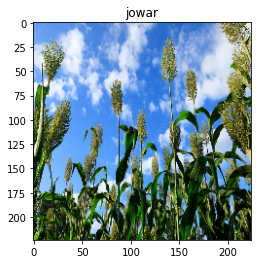

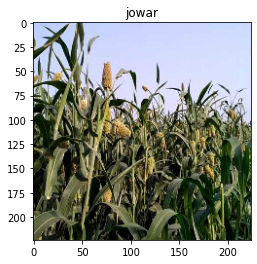

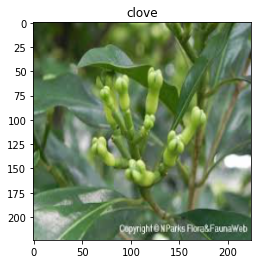

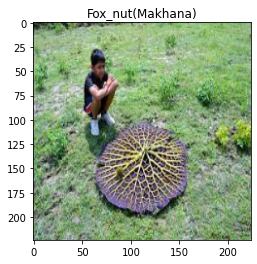

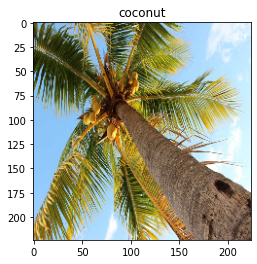

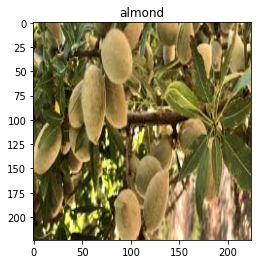

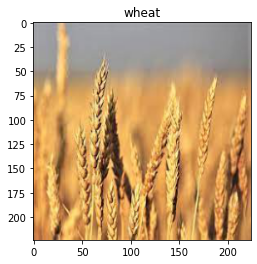

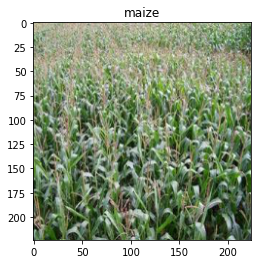

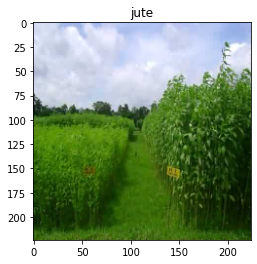

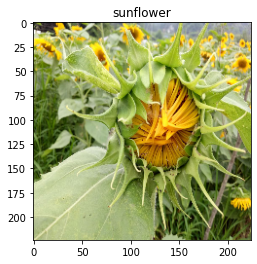

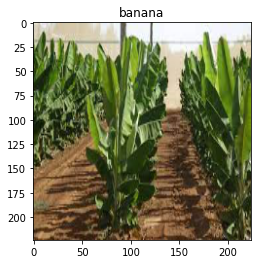

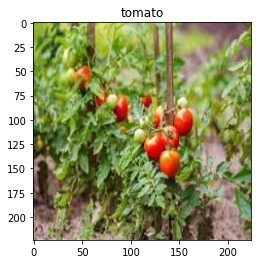

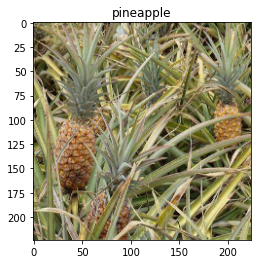

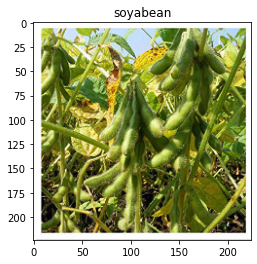

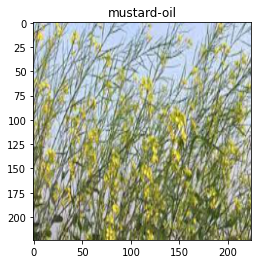

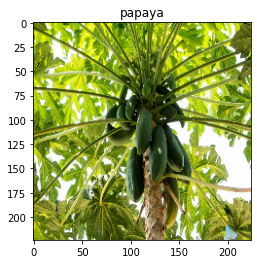

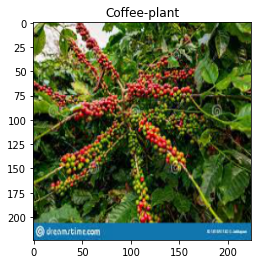

In [16]:
for x,lbl in zip(X[::27],y[::27]):
    plt.imshow(x)
    plt.title(lbl)
    plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [18]:
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(y)

In [19]:
encoded_labels.shape

(829,)

In [20]:
one_hot = OneHotEncoder()
one_hot_encodings = one_hot.fit_transform(encoded_labels.reshape((-1,1))).toarray()
one_hot_encodings = one_hot.fit_transform(y.reshape(-1,1)).toarray()

# cat_labels = tf.one_hot(y,len(classes))
# cat_labels = cat_labels.numpy()
# (one_hot_encodings == cat_labels).all()

In [21]:
X.shape , one_hot_encodings.shape

((829, 224, 224, 3), (829, 30))

In [22]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X,
                                                    one_hot_encodings,
                                                    test_size = 0.3,
                                                    shuffle = True,
                                                    stratify= one_hot_encodings,
                                                    random_state = 42)


In [23]:
X_val_test.shape , y_val_test.shape

((249, 224, 224, 3), (249, 30))

In [24]:
X_val, X_test, y_val, y_test = train_test_split(X_val_test,
                                                y_val_test,
                                                test_size = 0.5,
                                                shuffle = True,
                                                random_state = 42)

In [25]:
X_train.shape, X_val.shape, X_test.shape

((580, 224, 224, 3), (124, 224, 224, 3), (125, 224, 224, 3))

In [26]:
from collections import Counter
# Percentage of different label classifications in a set of labels.
def label_count(y):
    return {j : (j_val/len(y)) for j,j_val in Counter([str(i) for i in y]).items()}

train_count = label_count(y_train)
test_count = label_count(y_test)

# Difference between the ratios of corresponding samples. Should ideally be close to 0.
for i in train_count:
    print(i, "{:f}".format(train_count[i]-test_count[i]) )

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.] -0.013517
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.] 0.003586
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.] -0.024345
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.] 0.012207
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.] 0.004207
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.] -0.012414
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0.] 0.007034
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0.] 0.000759
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0.] 0.005310
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.

#Augmentation Routine

Rules for artificially increasing the size of the dataset by applying resizes, rescaling, rotations, flips and cropping.

In [28]:
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Resizing,Rescaling,\
RandomRotation, RandomFlip, RandomCrop

In [29]:
def aug_ds(X,Y,augment):
    """
    
    X - training samples
    Y - corresponding labels for training examples
    augment - The sequential layers to apply the transformations to the data.
    
    """

    aug_ds = np.array(list( map( lambda x: (augment(x,training=True) ) , X) ), dtype = 'float32' )
    
    return aug_ds, Y





In [30]:
np.max(X_train),np.pi

(1.0, 3.141592653589793)

((1160, 224, 224, 3), 0.0, 1.0)

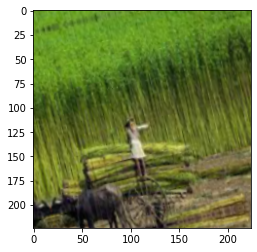

In [31]:
crop_fraction = 0.8
# Augmentation Strategy
augment = Sequential([
                        RandomCrop(int(crop_fraction*IMG_HEIGHT),int(crop_fraction*IMG_WIDTH),seed=42),
                        Resizing(IMG_HEIGHT,IMG_WIDTH),
#                         RandomZoom((0,0.5),seed=42),
                        RandomRotation(0.3,seed=42),
                        RandomFlip(mode = "horizontal",seed=42),                        
])

X_train_augmented = X_train 
y_train_augmented = y_train

for img in X_train[:5]:
  plt.imshow(img)


num_augments = 1

for i in range(num_augments):
    aug_X, aug_labels = aug_ds(X_train,y_train,augment)
    for img in aug_X:
      plt.imshow(img)

    X_train_augmented = np.concatenate((X_train_augmented, aug_X))
    y_train_augmented = np.concatenate((y_train_augmented, aug_labels))

# Normalize the augmented images
X_train_augmented = X_train_augmented * (1/np.max(X_train_augmented))
X_train_augmented.shape , np.min(X_train_augmented), np.max(X_train_augmented)


In [32]:
# Shuffle the images
X_train_augmented, y_train_augmented = utils.shuffle(X_train_augmented,y_train_augmented)

In [33]:
X_train_augmented.shape,y_train_augmented.shape

((1160, 224, 224, 3), (1160, 30))

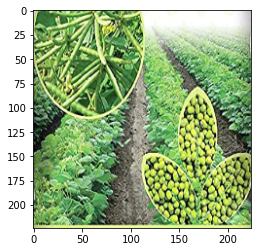

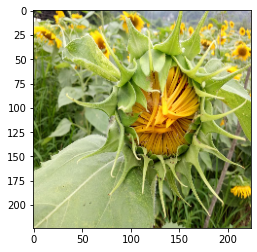

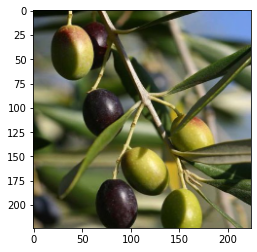

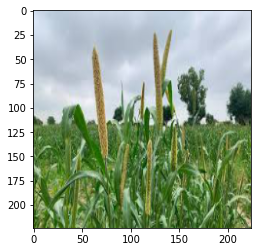

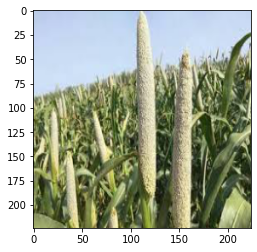

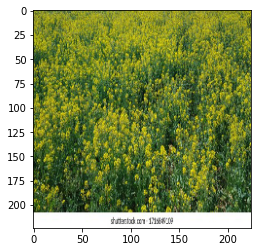

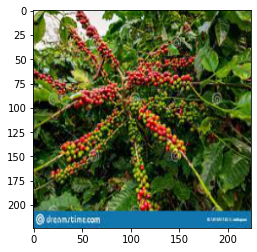

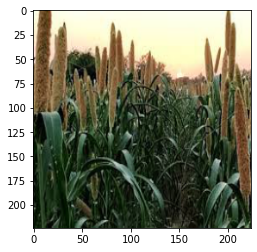

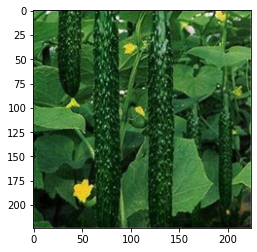

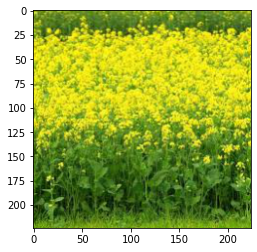

In [34]:
for i in range(10):
    plt.imshow(X_test[i])
    plt.title
    plt.show()
    

In [35]:
X_train_augmented.shape

(1160, 224, 224, 3)

/usr/local/lib/python3.8/dist-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


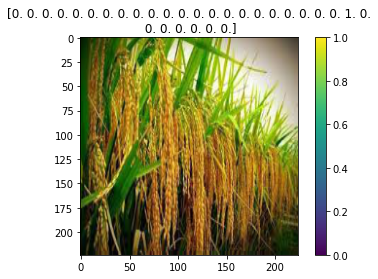

In [36]:
index = 256
plt.imshow(X_train[index])
plt.title(y_train[index])
plt.colorbar()

In [37]:
# Compile the model with an optimizer, loss function and metrics to measure performance
def compile_model(model,lr=0.001):
    model.compile(
        optimizer = tf.keras.optimizers.Adam(lr),
        loss = tf.keras.losses.CategoricalCrossentropy(),
        metrics = [
            tf.keras.metrics.CategoricalAccuracy()
        ]
    )
    return model

## Transfer Model definition

In [38]:
from keras.layers import Input,Conv2D,BatchNormalization,\
AveragePooling2D, MaxPooling2D, Dense, Flatten,\
Dropout, GlobalAveragePooling2D


In [39]:
def transfer_learning_model(model,num_of_classes):
    regularizer = None
    transfer_model = model(
        include_top = False,
        input_shape = (IMG_HEIGHT,IMG_WIDTH,3),
        weights = 'imagenet'
    )
    
    transfer_model.trainable = False
    transfer_model_output = transfer_model.output
    
    x = GlobalAveragePooling2D()(transfer_model_output)
    x = Dropout(0.3)(x)
    x = Dense(256,activation='relu')(x)
    x = Dense(num_of_classes,activation='softmax')(x)
    model = Model(inputs=transfer_model.input, outputs=x)
    return model

# Test bench

In [40]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.nasnet import NASNetMobile 


In [41]:
BATCH_SIZE = 64
VAL_BATCH_SIZE = len(X_test)
EPOCHS = 15

In [ ]:
# X_train_augmented = X_train
# y_train_augmented = y_train

In [42]:
X_train_augmented.shape, y_train_augmented.shape

((1160, 224, 224, 3), (1160, 30))

In [43]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [44]:
def train_models(X, y, X_val, y_val, batch_size, val_batch_size, epochs, model_collection):
  trained_models = {}
  model_histories = {}
  for name,mdl in model_collection.items():
      print(name)
      comp_mdl = compile_model(mdl,0.001)
      history = comp_mdl.fit(x = X,
                            y = y,
                            batch_size = batch_size,
                            validation_data = (X_val,y_val),
                            validation_batch_size = val_batch_size,
                            epochs = epochs,
                            callbacks = [
                                EarlyStopping(
                                    monitor = 'val_categorical_accuracy',
                                    patience = 3)
                            ]
                            )
      trained_models[name] = comp_mdl
      model_histories[name] = history.history
  return trained_models, model_histories

In [45]:
models = {
    "NASNetMobile" : transfer_learning_model(NASNetMobile,30),
    "inceptionv3" : transfer_learning_model(InceptionV3,30),
    "mobileNet" : transfer_learning_model(MobileNet,30),
    "mobileNetv2" : transfer_learning_model(MobileNetV2,30)

}
aug_trained_models, aug_model_histories = train_models(X_train_augmented, y_train_augmented, X_val, y_val, BATCH_SIZE, VAL_BATCH_SIZE, EPOCHS, models)
non_augmented_models = {
    "NASNetMobile" : transfer_learning_model(NASNetMobile,30),
    "inceptionv3" : transfer_learning_model(InceptionV3,30),
    "mobileNet" : transfer_learning_model(MobileNet,30),
    "mobileNetv2" : transfer_learning_model(MobileNetV2,30)

}
trained_models, model_histories = train_models(X_train, y_train, X_val, y_val, BATCH_SIZE, VAL_BATCH_SIZE, EPOCHS, non_augmented_models)

9406464/9406464 [==============================] - 0s 0us/step
NASNetMobile
Epoch 1/15
19/19 [==============================] - 33s 466ms/step - loss: 2.9214 - categorical_accuracy: 0.2181 - val_loss: 2.1309 - val_categorical_accuracy: 0.4032
Epoch 2/15
19/19 [==============================] - 3s 147ms/step - loss: 1.7639 - categorical_accuracy: 0.5448 - val_loss: 1.5036 - val_categorical_accuracy: 0.5323
Epoch 3/15
19/19 [==============================] - 3s 167ms/step - loss: 1.2438 - categorical_accuracy: 0.6509 - val_loss: 1.2943 - val_categorical_accuracy: 0.5887
Epoch 4/15
19/19 [==============================] - 3s 145ms/step - loss: 0.9459 - categorical_accuracy: 0.7362 - val_loss: 1.2447 - val_categorical_accuracy: 0.5565
Epoch 5/15
19/19 [==============================] - 3s 146ms/step - loss: 0.7852 - categorical_accuracy: 0.7905 - val_loss: 1.2039 - val_categorical_accuracy: 0.6048
Epoch 6/15
19/19 [==============================] - 3s 147ms/step - loss: 0.6243 - categorica

In [46]:
def print_performance(model_histories, metric):
  for model in model_histories:
    print(model,model_histories[model][metric], max(model_histories[model][metric]))

In [47]:
# Show accuracy of model with and without augmentation in each iteration with max performance found so far.
print("WITH AUGMENTATION")
print_performance(aug_model_histories, "val_categorical_accuracy")
print("WITHOUT AUGMENTATION")
print_performance(model_histories, "val_categorical_accuracy")

WITH AUGMENTATION
NASNetMobile [0.4032258093357086, 0.5322580933570862, 0.5887096524238586, 0.5564516186714172, 0.6048387289047241, 0.6532257795333862, 0.6370967626571655, 0.6532257795333862, 0.6532257795333862] 0.6532257795333862
inceptionv3 [0.41129031777381897, 0.5080645084381104, 0.5483871102333069, 0.6370967626571655, 0.6774193644523621, 0.6209677457809448, 0.6774193644523621, 0.6693548560142517] 0.6774193644523621
mobileNet [0.4032258093357086, 0.6693548560142517, 0.7016128897666931, 0.7580645084381104, 0.7419354915618896, 0.7661290168762207, 0.75, 0.774193525314331, 0.7661290168762207, 0.8064516186714172, 0.774193525314331, 0.7822580933570862, 0.774193525314331] 0.8064516186714172
mobileNetv2 [0.4838709533214569, 0.6129032373428345, 0.6693548560142517, 0.6451612710952759, 0.6774193644523621, 0.7177419066429138, 0.7096773982048035, 0.7419354915618896, 0.7096773982048035, 0.7419354915618896, 0.7096773982048035] 0.7419354915618896
WITHOUT AUGMENTATION
NASNetMobile [0.36290323734283

# Fine Tuning

In [48]:
def fine_tune_models(X, y, X_val, y_val, batch_size, val_batch_size, epochs, trained_models, model_histories):
  for model_name in trained_models:
      print(model_name)
      fine_tune = trained_models[model_name]
      # Freeze the decision layers and unfreeze the base model
      fine_tune.trainable = True
      for l in fine_tune.layers[-3:]:
          l.trainable = False
      history = fine_tune.fit(x = X,
                            y = y,
                            batch_size = batch_size,
                            validation_data = (X_val,y_val),
                            validation_batch_size = val_batch_size,
                            epochs = epochs,
                            callbacks = [
                                EarlyStopping(
                                    monitor = 'val_categorical_accuracy',
                                    patience = 3),
                                ReduceLROnPlateau(
                                    monitor = 'val_categorical_accuracy',
                                    patience = 3,
                                    
                                
                                )
                            ]
                            )
      
      # Append histories of the models
      for metric in model_histories[model_name]:
          model_histories[model_name][metric] = model_histories[model_name][metric] + history.history[metric]
      # Reverse the training layer changes
      fine_tune.trainable = False
      for l in fine_tune.layers[-3:]:
          l.trainable = True
      return trained_models, model_histories

In [49]:
aug_trained_models, aug_model_histories =  fine_tune_models(X_train_augmented, y_train_augmented, X_val, y_val, BATCH_SIZE , VAL_BATCH_SIZE, 10, aug_trained_models, aug_model_histories)
trained_models, model_histories = fine_tune_models(X_train, y_train, X_val, y_val, BATCH_SIZE , VAL_BATCH_SIZE, 10, trained_models, model_histories)

NASNetMobile
Epoch 1/10
19/19 [==============================] - 3s 152ms/step - loss: 0.3251 - categorical_accuracy: 0.9267 - val_loss: 0.9611 - val_categorical_accuracy: 0.7016 - lr: 0.0010
Epoch 2/10
19/19 [==============================] - 3s 143ms/step - loss: 0.2846 - categorical_accuracy: 0.9414 - val_loss: 1.0917 - val_categorical_accuracy: 0.6935 - lr: 0.0010
Epoch 3/10
19/19 [==============================] - 3s 152ms/step - loss: 0.2488 - categorical_accuracy: 0.9448 - val_loss: 1.1099 - val_categorical_accuracy: 0.6129 - lr: 0.0010
Epoch 4/10
19/19 [==============================] - 3s 159ms/step - loss: 0.2193 - categorical_accuracy: 0.9560 - val_loss: 1.0346 - val_categorical_accuracy: 0.6694 - lr: 0.0010
NASNetMobile
Epoch 1/10
10/10 [==============================] - 2s 187ms/step - loss: 0.2544 - categorical_accuracy: 0.9397 - val_loss: 0.9891 - val_categorical_accuracy: 0.6694 - lr: 0.0010
Epoch 2/10
10/10 [==============================] - 2s 181ms/step - loss: 0.224

In [50]:
print("WITH AUGMENTATION")
print_performance(aug_model_histories, "val_categorical_accuracy")
print("WITHOUT AUGMENTATION")
print_performance(model_histories, "val_categorical_accuracy")

WITH AUGMENTATION
NASNetMobile [0.4032258093357086, 0.5322580933570862, 0.5887096524238586, 0.5564516186714172, 0.6048387289047241, 0.6532257795333862, 0.6370967626571655, 0.6532257795333862, 0.6532257795333862, 0.7016128897666931, 0.6935483813285828, 0.6129032373428345, 0.6693548560142517] 0.7016128897666931
inceptionv3 [0.41129031777381897, 0.5080645084381104, 0.5483871102333069, 0.6370967626571655, 0.6774193644523621, 0.6209677457809448, 0.6774193644523621, 0.6693548560142517] 0.6774193644523621
mobileNet [0.4032258093357086, 0.6693548560142517, 0.7016128897666931, 0.7580645084381104, 0.7419354915618896, 0.7661290168762207, 0.75, 0.774193525314331, 0.7661290168762207, 0.8064516186714172, 0.774193525314331, 0.7822580933570862, 0.774193525314331] 0.8064516186714172
mobileNetv2 [0.4838709533214569, 0.6129032373428345, 0.6693548560142517, 0.6451612710952759, 0.6774193644523621, 0.7177419066429138, 0.7096773982048035, 0.7419354915618896, 0.7096773982048035, 0.7419354915618896, 0.70967739

# Graph of Validation Accuracy over Epochs

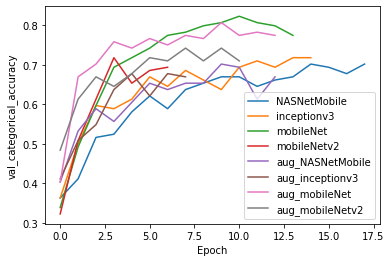

In [56]:
metric = 'val_categorical_accuracy'
plt.xlabel('Epoch')
plt.ylabel(metric)
for mdl_name,mdl_hist in model_histories.items():
    plt.plot(mdl_hist[metric],label=mdl_name)

for mdl_name,mdl_hist in aug_model_histories.items():
    plt.plot(mdl_hist[metric],label='aug_'+mdl_name)
plt.legend()
plt.show()

# Evaluation on test set

Best Model trained and finetuned was MobileNet, however some models have overfit the training data with fine-tuning.

In [65]:
predictions = dict()
eval_results = dict()
for model_name in trained_models:
    print(model_name)
    predictions[model_name] = np.argmax(trained_models[model_name].predict(X_test))
    eval_results[model_name] = trained_models[model_name].evaluate(X_test,y_test)

for model_name in aug_trained_models:
    print(model_name)
    predictions["aug_"+model_name] = np.argmax(trained_models[model_name].predict(X_test))
    eval_results["aug_"+model_name] = aug_trained_models[model_name].evaluate(X_test,y_test)
eval_results

NASNetMobile
4/4 [==============================] - 0s 81ms/step - loss: 1.4277 - categorical_accuracy: 0.6320
inceptionv3
4/4 [==============================] - 0s 74ms/step - loss: 1.4838 - categorical_accuracy: 0.6400
mobileNet
4/4 [==============================] - 0s 38ms/step - loss: 0.9852 - categorical_accuracy: 0.7360
mobileNetv2
4/4 [==============================] - 0s 43ms/step - loss: 1.1009 - categorical_accuracy: 0.7600
NASNetMobile
4/4 [==============================] - 0s 70ms/step - loss: 1.3712 - categorical_accuracy: 0.6720
inceptionv3
4/4 [==============================] - 0s 74ms/step - loss: 1.5783 - categorical_accuracy: 0.6080
mobileNet
4/4 [==============================] - 0s 38ms/step - loss: 1.0243 - categorical_accuracy: 0.7600
mobileNetv2
4/4 [==============================] - 0s 42ms/step - loss: 1.3217 - categorical_accuracy: 0.7600


{'NASNetMobile': [1.4277008771896362, 0.6320000290870667],
 'inceptionv3': [1.483811855316162, 0.6399999856948853],
 'mobileNet': [0.9852416515350342, 0.7360000014305115],
 'mobileNetv2': [1.1009076833724976, 0.7599999904632568],
 'aug_NASNetMobile': [1.3712332248687744, 0.671999990940094],
 'aug_inceptionv3': [1.5782626867294312, 0.6079999804496765],
 'aug_mobileNet': [1.0242938995361328, 0.7599999904632568],
 'aug_mobileNetv2': [1.3216713666915894, 0.7599999904632568]}

In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix

<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>

In [62]:
print(predictions)
print(os.getcwd())
best_model_by_accuracy = max(eval_results,key = lambda x : eval_results[x][1])
best_model_by_accuracy, eval_results[best_model_by_accuracy]

{'NASNetMobile': 242, 'inceptionv3': 1802, 'mobileNet': 2856, 'mobileNetv2': 2856, 'aug_NASNetMobile': 242, 'aug_inceptionv3': 1802, 'aug_mobileNet': 2856, 'aug_mobileNetv2': 2856}
/content


('mobileNetv2', [1.1009076833724976, 0.7599999904632568])

1/1 [==============================] - 0s 325ms/step
0
[[9.3463161e-05 4.8174354e-01 3.4004536e-02 4.4211321e-02 3.9443281e-02
  2.4064183e-03 5.8168550e-03 4.4368040e-03 1.4875521e-02 2.1051255e-03
  8.9606106e-02 9.6647236e-03 5.8279018e-04 1.2690237e-02 4.0752976e-03
  7.2576809e-03 9.5823156e-03 1.1535535e-02 1.5541345e-03 1.2217682e-03
  4.4551954e-02 2.4653238e-03 2.9329749e-04 4.8165210e-03 1.1247821e-03
  1.9665090e-03 2.1651069e-02 1.6702401e-03 1.4454700e-01 5.7821208e-06]]
1 0.48174354
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0.]


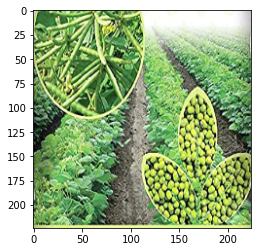

In [66]:
index = 0
correct_prediction = True
plt.imshow(X_test[index])
res = trained_models[best_model_by_accuracy].predict(np.array([X_test[index]]))
argmax = np.argmax(res)
correct_prediction = y_test[index][argmax] == 1
print(index)
print(res)
print(argmax,res[0][argmax])
print(y_test[index])

In [67]:
def plot_metric(model_name,model_history,metric):
    fig = plt.figure(figsize=(6,3))
    to_plot = model_history[metric]
    to_plot_val = model_history["val_"+metric]
    
    plt.plot(to_plot, label = metric)
    plt.plot(to_plot_val, label="val_"+metric)
    
    plt.xlabel('Epoch')
    plt.ylabel(metric)
    plt.title(model_name)
    plt.legend()
    plt.show()

['loss', 'categorical_accuracy']
NASNetMobile


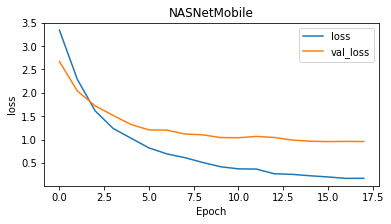

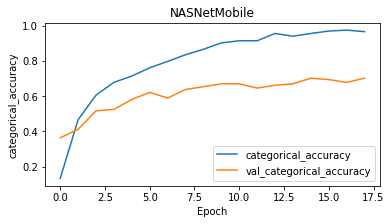

inceptionv3


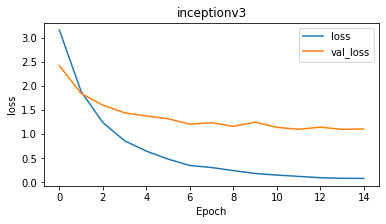

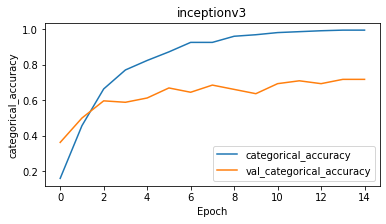

mobileNet


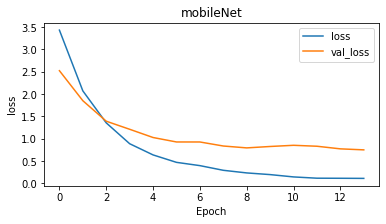

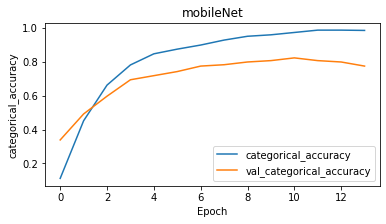

mobileNetv2


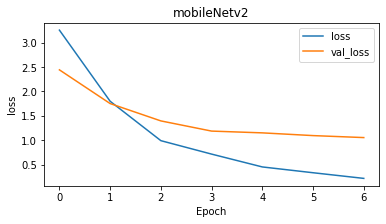

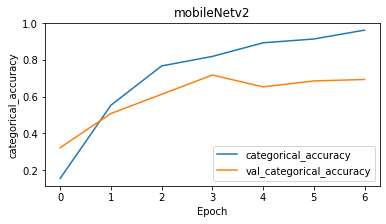

In [68]:
metrics = list(model_histories.items())[0][1].keys()
metrics = [metric for metric in metrics if metric[:4] != 'val_']
print(metrics)
for mdl_name,mdl_hist in model_histories.items():
    print(mdl_name)
    for m in metrics:
        plot_metric(mdl_name,mdl_hist,m)